# Merge Sort
Merge sort is a sorting algorithm that uses divide and conquer. The function continues dividing the array into left and right subarrays until each subarray is length 1. Then, the function combines adjacent arrays, putting elements in ascending order. Subarrays are merged into bigger and bigger subarrays until the final array is created. Merge sort is an efficient sorting algorithm.  <br>
Facts about merge sort:
* comparison sorting algorithm: compares elements of an array
* stable sorting algorithm: preserves the relative order of equivalent elements
* not an in-place algorithm: O(n) auxiliary space is required to run this algorithm since an additional array of length n is needed
    * for sorting linked lists, function can be implemented to have space complexity O(1)
* not an adaptive algorithm: run time is not affected when given a partially sorted array
* determinisitic algorithm: when given a certain input, same sequence of steps and result occurs

In [1]:
# global imports
from time import time
import matplotlib.pyplot as plt
import math
from pandas import DataFrame
import statsmodels.formula.api as sm
import numpy as np

## Merge Sort Function
Steps to implement merge sort function:
1. write code for the divide phase
 - create a base case that stops the recursive calls when the length of a subarray equals 1
 - find the middle index of the array
 - create a left subarray that contains all elements up to (not including) the middle index
 - create a right subarray that contains all elements from the middle index to the end of the array
 - recursively call mergeSort() on the left subarray to create subarrays until all subarrays are length 1
 - recursively call mergeSort() on the right subarray to create subarrays until all subarrays are length 1
2. write code for the conquer phase
 - initialize i, j, and k to track the current index of the left, right, and sorted array
 - create a while loop that executes when both the left and right subarrays have unused items
 - if the ith item of the left subarray is less than the jth item of the right subarray, set the kth item of the sorted array to be the ith item
 - if the jth item of the right subarray is less than the ith item of the left subarray, set the kth item of the sorted array to be the jth item
 - create a while loop that executes when there are still elements in the left subarray and no elements in the right subarray. This while loop copies remaining items to the sorted array
 - create a while loop that executes when there are still elements in the right subarray and no elements in the left subarray. This while loop copies remaining items to the sorted array
 - if mergeSort() is called recursively 2n times, the process of combining subarrays into larger sorted subarrays will occur n times--until a final sorted array is created

In [2]:
# merge sort function
def mergeSort(arr):
    '''sorts an array of integers from smallest to largest'''
    # divide phase
    if len(arr) == 1:
        return
    middleIndex = len(arr) // 2
    left = arr[: middleIndex]
    right = arr[middleIndex :]
    mergeSort(left)
    mergeSort(right)
    # conquer phase
    i = 0
    j = 0
    k = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            arr[k] = left[i]
            i = i + 1
        else:
            arr[k] = right[j]
            j = j + 1
        k = k + 1
    while i < len(left):
        arr[k] = left[i]
        k = k + 1
        i = i + 1
    while j < len(right):
        arr[k] = right[j]
        k = k + 1
        j = j + 1  

## Timing Function
To obtain observed values for the runtime of the algorithm, I wrote a function that times how long it takes for the program to merge sort an array. Steps to implement the timing function:
1. initialize a variable t that will hold the runtime
2. set t0 equal to the current time (before sorting)
3. sort the array with merge sort
4. set t1 to the current time (after sorting)
5. set t equal to the difference between t1 and t0, which is the run time for sorting the array
6. return the run time

In [3]:
def timeOneMerge(arr):
    '''times how long it takes to sort an array'''
    t = 0
    t0 = time()
    s = mergeSort(arr)
    t1 = time()
    t = t1 - t0
    return t

## Sort Sample Arrays and Find Run Time
1. import arrrays of different lengths. These arrays are created in the arrays program. The arrays are used for each sorting algorithm, allowing for direct comparison of algorithms.
3. use timeOneMerge() function to find the run time of sorting each array

In [4]:
# import arrays from array program
%store -r arr1
%store -r arr2
%store -r arr3
%store -r arr4
%store -r arr5
%store -r arr6
%store -r arr7
%store -r arr8

# time how long it takes to sort each array
time1 = timeOneMerge(arr1)
time2 = timeOneMerge(arr2)
time3 = timeOneMerge(arr3)
time4 = timeOneMerge(arr4)
time5 = timeOneMerge(arr5)
time6 = timeOneMerge(arr6)
time7 = timeOneMerge(arr7)
time8 = timeOneMerge(arr8)

# create an array of times
times = [time1, time2, time3, time4, time5, time6, time7, time8]

## Theoretical Run Time with Big O
### Time Complexity of Merge Sort Function
For the worst case scenario, the arrays are arranged so the maximum number of comparisons occur during the conquer phase. I used an array with an even number of elements and the right array has the largest item when I calculated this time complexity. <br> 
Time complexity for mergeSort() <br>
Divide phase:
1. each statement inside the divide and conquer phase gets executed once
2. the recursive call mergeSort() on the left runs in T(n/2) time
3. the recursive call mergeSort() on the right runs in T(n/2) time
4. sum time complexities of all the statements to get T = 2T(n/2) + a <br>

Conquer phase:
1. for the worst case scenario, the first while loop executes n times
 - it iterates n - 1 times, plus runs an additional time to check that the condition is not met
2. statements inside the first while loop execute n-1 times
3. when there are no items in the left subarray, the second while loop executes once
 - it executes 1 time to check that the condition is not met
4. statements inside the second while loop do not execute
5. when there is 1 item in the right subarray, the third while loop executes 2 times
 - it iterates 1 time, plus runs an additional time to check that the condition is not met
6. statements inside the thrid while loop run 1 time
7. sum time complexities of all the statements to get T = an + b <br>

Together:
1. add the time complexities from the divide and conquer phases to get T = 2T(n/2) + an + b
2. expand expression
 - T = 2T(n/2) + an + b
 - T = 2(2T(n/2) + an/2 + b) + cn + d = 4T(n/4) + 2an + b
 - T = 4(2T(n/8) + an/4 + b) + cn + d = 8T(n/8) + 3an + b
 - ...
 - T = 2^kT(n/(2^k)) + kan + b
3. transform expression to T(1) = 1 run time
 - T(1) = T(n/(2^k)), so 1 = n/(2^k), 2^k = n, and k = logn where log is base 2
 - T = nT(1) + log(n)an + b
4. then we have T = anlog(n) + bn + c
5. the fastest growing term is anlog(n), so nlog(n) goes in the O() expression <br>

The time complexity for merge sort is O(nlog(n))

### Theoretical Time Complexity Using O(nlog(n))
Steps to find the theoretical run time with Big O:
1. create an X matrix of predictors
 - create columns of 1, n and nlog(n) where n is the array length
 - use array lengths of the sample arrays: 3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500
2. create a Y matrix of responses
 - use the sample run times
3. use multiple linear regression to get the equation Y = a + bn + cnlog(n)
 - a, b, and c are ordinary least squares estimated coefficients
4. since merge sort is O(nlog(n)), theoretical run times are T = a + bn + cnlog(n)
 - use the coefficients found in multiple linear regression
 - n represents the length of the array

In [5]:
# array of ones
ones = [1, 1, 1, 1, 1, 1, 1, 1]

# array of lengths
length = [3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500]

# create array of lengthLogLength
lengthLogLength = []
for i in range(0, 8):
    val = length[i] * math.log2(length[i])
    lengthLogLength.append(val)

# create a dataframe
Data = {'ones': ones, 'length': length, 'lengthLogLength': lengthLogLength, 'times': times}
df = DataFrame(Data, columns=['ones', 'length', 'lengthLogLength', 'times'])
# matrix of predictors
X = df[['ones', 'length', 'lengthLogLength']]
# vector of responses
Y = df['times']

# fit multiple linear regression
result = sm.OLS(Y, X).fit()

# theoretical coefficients
a = result.params[0]
b = result.params[1]
c = result.params[2]

### Ordinary Least Squares Estimated Coefficients
See below for summary statements regarding the estimated coefficients and their 95% confidence intervals
* the intercept coefficient has a confidence interval containg 0, which is incorrect
    * a confidence interval containing 0 suggests if there are 0 elements in an array, the computer will take 0 time to sort the array
    * this is not true, the computer will still run through the heap sort function, which takes a small amount of time
    * note that the standard error for this coefficient is large--this causes the confidence interval to incorrectly contain 0
* the predictor coefficients have estimates close to 0, as expected
    * coefficients measure changes in run time with small changes in array length, and we expect these changes to be slight
    * significant increases in run times occur when there are large changes in array length
    * a confidence interval containing 0 may not necessarily be incorrect; adding one element to an array may produce an immeasurable change in run time

In [6]:
# variable holding confidence intervals
confInt = result.conf_int(alpha = 0.05, cols = None)
# variable holding standard errors
stE = result.bse

# intercept
aDec = '{:10.9f}'.format(a)
intercept = ('The estimated intercept is {x}. If the size of an array is 0, on average,' 
                ' I expect the run time to be {y} seconds.').format(x = aDec, y = aDec)
print(intercept)
# intercept confidence interval
aLower = '{:10.9f}'.format(confInt[0][0])
aUpper = '{:10.9f}'.format(confInt[1][0])
intCI = ('I am 95% confident that the true average run time for an array of length 0 is between'
            ' {x} and {y} seconds.').format(x = aLower, y = aUpper)
print(intCI)
# intercept standard error
aStE = '{:10.9f}'.format(stE[0])
intStE = ('The standard error of the intercept is {x}.').format(x = aStE)
print(intStE)
print()

# coefficient for n 
bDec = '{:10.9f}'.format(b)
coef1 = ('The estimated coefficent for the n term is {x}. If the size of an array increases by 1 element, on' 
         ' average, I expect the run time to increase by {y} seconds.').format(x = bDec, y = bDec)
print(coef1)
# coefficient for n confidence interval
bLower = '{:10.9f}'.format(confInt[0][1])
bUpper = '{:10.9f}'.format(confInt[1][1])
coef1CI = ('I am 95% confident that the true expected change in run time for a one unit increase in array size'
            ' is between {x} and {y} seconds.').format(x = bLower, y = bUpper)
print(coef1CI)
# coefficient for n standard error
bStE = '{:10.9f}'.format(stE[1])
coef1StE = ('The standard error of the coefficient for the n term is {x}.').format(x = bStE)
print(coef1StE)
print()

# coefficient for nlogn
cDec = '{:10.9f}'.format(c)
coef2 = ('The estimated coefficent for the nlog2(n) term, where n is the size of the array, is {x}. If nlog(n) '
         'increases by 1 element, on average, I expect the run time to increase by {y} '
         'seconds.').format(x = cDec, y = cDec)
print(coef2)
# coeficcient for nlogn confidence interval
cLower = '{:10.9f}'.format(confInt[0][2])
cUpper = '{:10.9f}'.format(confInt[1][2])
coef2CI = ('I am 95% confident that the true expected change in run time for a one unit increase in nlog2(n) '
            'is between {x} and {y} seconds.').format(x = cLower, y = cUpper)
print(coef2CI)
# coefficient for nlogn standard error
cStE = '{:10.9f}'.format(stE[2])
coef2StE = ('The standard error of the coefficient for the nlog(n) term is {x}.').format(x = cStE)
print(coef2StE)

The estimated intercept is -0.017393745. If the size of an array is 0, on average, I expect the run time to be -0.017393745 seconds.
I am 95% confident that the true average run time for an array of length 0 is between -0.055775400 and 0.020987910 seconds.
The standard error of the intercept is 0.014931116.

The estimated coefficent for the n term is 0.000031094. If the size of an array increases by 1 element, on average, I expect the run time to increase by 0.000031094 seconds.
I am 95% confident that the true expected change in run time for a one unit increase in array size is between -0.000021744 and 0.000083932 seconds.
The standard error of the coefficient for the n term is 0.000020555.

The estimated coefficent for the nlog2(n) term, where n is the size of the array, is -0.000001687. If nlog(n) increases by 1 element, on average, I expect the run time to increase by -0.000001687 seconds.
I am 95% confident that the true expected change in run time for a one unit increase in nlog2

## Compare Theoretical and Observed Run Time

### Scatterplot 

I created a scatterplot of the observed run times and the theoretical run times for sorting arrays of different lengths.
* observed run times are plotted in blue, theoretical trend line is drawn in red
* observed values are very close to the theoretical trend line, meaning the theoretical run time of O(nlog(n)) is a good estimate for this data
* discrepancies between observed and theoretical run time may be caused by experimental error: merge sort orders arrays very quickly, meaning any delay encountered by the computer significantly impacts observed results
* there is a positive relationship between array size and run time

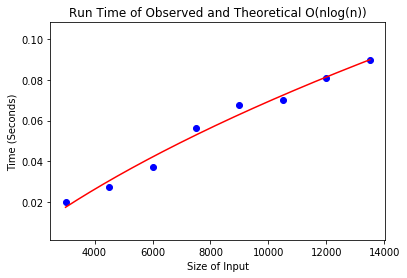

In [7]:
# regression line equation
x = np.linspace(3000, 13500, 10500)
line = a + b * x + c * x * np.log2(x)

# scatterplot of observed and theoretical O(n^2) values
plt.scatter(length, times, c = 'b')  # plot observed values in blue
plt.plot(x, line, c = 'r')  # plot regression line equation in red
plt.xlabel('Size of Input')
plt.ylabel('Time (Seconds)')
plt.title('Run Time of Observed and Theoretical O(nlog(n))')
plt.show()

### Mean Squared Error
- mean squared error measures the squared distance between observed and theoretical values. A small mean squared error indicates observed and theoretical run times are similar
- merge sort obtains an MSE that is close to 0, meaning the theoretical run times are a good estimate
- this means merge sort has a run time of O(nlog(n))

In [10]:
# output the MSE
MSE = '{:10.9f}'.format(result.mse_resid)
MSE

'0.000015915'

## Conclusion
- the theoretical run time of heap sort is O(nlog(n))
- data obtained from sorting sample arrays supports this conclusion
    - on the scatterplot, observed values are close to theoretical values
    - the mean squared error is close to 0